# README

This notebook brings together the main steps and code from our project. Some results may not be shown here because they were run in other notebooks to keep things organized and efficient.

- This notebook collects the important parts of the process from different Python files and Jupyter notebooks.
- Some outputs may be missing because the calculations were done in other notebooks.
- The complete project, including all files and notebooks, will be shared in a **GitHub repository** in the final report.

In [15]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

from tqdm import tqdm
import pandas as pd
import numpy as np
import json

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Prep

In [16]:
from src.data_helper import generate_player_data_v3, generate_base_player_data

with open('../data/players_detailed_5league_5year.json') as f:
    data = json.load(f)

team_metadata = pd.read_csv("../data/team_id_league_types.csv")

df_base = generate_base_player_data(data)
df, league_club_features, national_club_features, league_features = generate_player_data_v3(data, team_metadata)

Extracting unique features...


Feature Extraction: 100%|██████████| 3555/3555 [00:00<00:00, 134687.83it/s]


Processing player data...


Player Processing:  14%|█▎        | 481/3555 [00:01<00:08, 347.94it/s]

Player Processing: 100%|██████████| 3555/3555 [00:10<00:00, 336.90it/s]


In [17]:
df.isna().sum()

Player                     0
Age                        3
Weight                   583
Height                   327
Position                   2
Nationality                5
League Club History        0
National Club History      0
League History             0
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df["Player"] = df["Player"].astype(int)

## Similarity calculation

In [20]:
from src.data_helper import compute_weighted_similarity

similarity_df = compute_weighted_similarity(
    df,
    league_club_weight=5.0,
    national_club_weight=1.5,
    league_history_weight=1.0,
    age_weight=0,
    weight_weight=0,
    height_weight=0,
    position_weight=1.0,
    nationality_weight=1.5
)
similarity_df.to_csv("../data/similarities_final.csv")

Calculating Similarities:   1%|          | 28927/4414906 [00:06<16:23, 4457.31it/s]

Calculating Similarities: 100%|██████████| 4414906/4414906 [15:54<00:00, 4626.08it/s]


In [6]:
from src.data_helper import get_max_similarity
get_max_similarity(similarity_df)

Maximum value is at row: 702, column: 701


In [17]:
from src.data_helper import get_similarity_vector
get_similarity_vector(similarity_df, idx=701, df_base=df_base, similar_data_num=5)

,Id,Player Name,Firstname,Lastname,Age,Birth Date,Birth Place,Birth Country,Nationality,Height,Weight,Number,Position,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2007,2006,2008,2005,2004,2003,2022,2021,2023,2002,2001,2000,1999,1998,1997,1996,2024,2026,2025,,1995,1994,similarity_score
701,162,T. Alderweireld,Toby Albertine Maurits,Alderweireld,36.0,1989-03-02,Wilrijk,Belgium,Belgium,186 cm,81 kg,23.0,Defender,"[Belgium, Tottenham]",[Tottenham],"[Belgium, Tottenham]","[Belgium, Tottenham]","[Belgium, Tottenham]","[Belgium, Tottenham]","[Belgium, Atletico Madrid]","[Belgium, Atletico Madrid]","[Belgium, Ajax]","[Belgium, Ajax, Belgium U21]","[Belgium, Ajax]","[Belgium, Ajax]",NaN,NaN,[Ajax],NaN,NaN,NaN,"[Antwerp, Belgium]","[Belgium, Al-Duhail SC]","[Antwerp, Belgium]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Antwerp],NaN,NaN,NaN,NaN,NaN,0.000000
702,170,J. Vertonghen,Jan,Vertonghen,38.0,1987-04-24,Sint-Niklaas,Belgium,Belgium,189 cm,79 kg,14.0,Defender,"[Belgium, Benfica]",[Tottenham],"[Belgium, Tottenham]","[Belgium, Tottenham]","[Belgium, Tottenham]","[Belgium, Tottenham]","[Belgium, Tottenham]","[Belgium, Tottenham]","[Belgium, Tottenham]","[Belgium, Ajax]","[Belgium, Ajax]","[Belgium, Ajax]",[Ajax],[Ajax],"[Belgium, Ajax, Belgium U21]",NaN,NaN,NaN,"[Anderlecht, Belgium]","[Belgium, Benfica]","[Anderlecht, Belgium]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Anderlecht, Belgium]",NaN,NaN,NaN,NaN,NaN,9.007856
144,2921,M. Dembélé,Mousa Sidi Yaya,Dembélé,37.0,1987-07-16,Antwerpen,Belgium,Belgium,185 cm,82 kg,NaN,Midfielder,"[Guangzhou R&F, Belgium]",[Guangzhou R&F],"[Belgium, Tottenham]","[Belgium, Tottenham]","[Belgium, Tottenham]","[Belgium, Tottenham]","[Belgium, Tottenham]","[Belgium, Tottenham]","[Belgium, Tottenham]","[Belgium, Fulham]","[Belgium, Fulham]","[Belgium, AZ Alkmaar]","[Belgium, AZ Alkmaar]","[Belgium, AZ Alkmaar]","[Belgium, AZ Alkmaar, Belgium U21]",[Willem II],NaN,NaN,NaN,[Guangzhou R&F],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.368127
540,174,C. Eriksen,Christian,Dannemann Eriksen,33.0,1992-02-14,Middelfart,Denmark,Denmark,182 cm,76 kg,10.0,Midfielder,"[Denmark, Inter]","[Denmark, Inter]","[Denmark, Tottenham]","[Denmark, Tottenham]","[Denmark, Tottenham]","[Denmark, Tottenham]","[Denmark, Tottenham]","[Denmark, Tottenham]","[Denmark, Ajax]","[Denmark, Ajax, Denmark U21]","[Denmark, Ajax]",[Ajax],NaN,NaN,NaN,NaN,NaN,NaN,"[Manchester United, Denmark]","[Denmark, Brentford]","[Manchester United, Denmark]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Manchester United, Denmark]",NaN,NaN,NaN,NaN,NaN,4.686231
483,629,K. De Bruyne,Kevin,De Bruyne,34.0,1991-06-28,Drongen,Belgium,Belgium,181 cm,68 kg,17.0,Midfielder,"[Manchester City, Belgium]",[Manchester City],"[Manchester City, Belgium]","[Manchester City, Belgium]","[Manchester City, Belgium]","[Manchester City, Belgium]","[Belgium, VfL Wolfsburg]","[Belgium, VfL Wolfsburg]","[Belgium, Chelsea]","[Belgium, Genk]","[Belgium, Genk, Belgium U19]",[Genk],NaN,NaN,[Genk],NaN,NaN,NaN,"[Manchester City, Belgium]","[Manchester City, Belgium]","[Manchester City, Belgium]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Manchester City, Belgium]",NaN,NaN,NaN,NaN,NaN,4.102084
547,907,R. Lukaku,Romelu Menama,Lukaku Bolingoli,32.0,1993-05-13,Antwerpen,Belgium,Belgium,191 cm,93 kg,11.0,Attacker,"[Belgium, Inter]",[Inter],"[Belgium, Manchester United]","[Belgium, Manchester United]","[Belgium, Everton]","[Belgium, Everton]","[Belgium, Everton]","[Chelsea, Belgium]","[Belgium, West Brom]","[Chelsea, Belgium, Belgium U21]","[Belgium, Anderlecht]",[Anderlecht],NaN,NaN,[Anderlecht],NaN,NaN,NaN,"[Chelsea, Belgium]","[Chelsea, Belgium]","[Chelsea, Belgium]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Napoli, Belgium]",NaN,NaN,NaN,NaN,NaN,4.053063


## Clustering

In [18]:
# Make data 2d
data = df["League Club History"].values
data_club_history = np.array([np.array(row) for row in data])

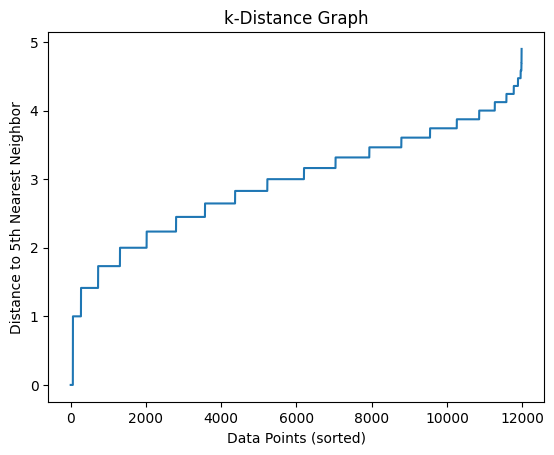

In [20]:
from src.clustering import plot_k_distance_graph
plot_k_distance_graph(data_club_history)

In [21]:
from src.clustering import apply_dbscan

df_tmp = df.copy()
df_tmp["clusters"] = apply_dbscan(data_club_history, eps=2.5, min_samples=5)
df_tmp["clusters"].value_counts()

clusters
-1    7673
 0    4308
 1       5
Name: count, dtype: int64

In [6]:
from src.clustering import apply_kmeans

df_tmp = df.copy()
df_tmp["clusters"] = apply_kmeans(data_club_history)
df_tmp["clusters"].value_counts()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
from src.clustering import iterative_kmeans

clustered_df, clustering_results = iterative_kmeans(df.copy(), column_name="League Club History", initial_k=10, max_iterations=5)
clustered_df["Final Cluster"].value_counts()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: Fut

Final Cluster
42    10254
31      108
34       87
27       87
25       78
36       58
38       55
24       54
48       52
18       50
21       50
14       49
8        49
22       47
16       45
6        44
40       42
0        41
9        40
5        40
37       40
33       39
1        38
30       38
23       38
39       37
28       36
45       35
11       35
2        33
20       31
46       30
32       29
41       27
17       27
26       26
13       25
47       24
49       23
19       20
44       18
7         2
43        2
12        1
10        1
4         1
Name: count, dtype: int64

## AE Modelling

In [27]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = df[["Position", "Nationality"]]

encoder = OneHotEncoder(sparse=False)
encoded_categorical = encoder.fit_transform(categorical_features)

categorical_columns = encoder.get_feature_names_out(["Position", "Nationality"])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=categorical_columns, index=df.index)

df = pd.concat([df.drop(columns=["Position", "Nationality"]), encoded_categorical_df], axis=1)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
from torch.utils.data import DataLoader, TensorDataset
from src.train_helper import train_multihead_ae
from src.losses import weighted_loss_function
from src.ae import MultiHeadAutoEncoder
from datetime import datetime
import torch

dataset = TensorDataset(
    torch.Tensor(df["League Club History"].values.tolist()),
    torch.Tensor(df["National Club History"].values.tolist()),
    torch.Tensor(df["League History"].values.tolist()),
    torch.Tensor(df[["Age", "Weight", "Height"]].values), 
    torch.Tensor(encoded_categorical) 
)

train_loader = DataLoader(dataset, batch_size=32, shuffle=True)


input_sizes = {
    "League Club History": len(df["League Club History"].iloc[0]),
    "National Club History": len(df["National Club History"].iloc[0]),
    "League History": len(df["League History"].iloc[0]),
    "Attributes": 3,  
    "Categorical": encoded_categorical.shape[1] 
}

model = MultiHeadAutoEncoder(input_sizes=input_sizes, embedding_dim=64)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

weights = {
    "league_dim": len(df["League Club History"].iloc[0]),
    "national_dim": len(df["National Club History"].iloc[0]),
    "league_history_dim": len(df["League History"].iloc[0]),
    "attributes_dim": 3, 
    "categorical_dim": encoded_categorical.shape[1], 
    "league_reconstruction": 5.0,
    "national_reconstruction": 3.0,
    "league_history_reconstruction": 2.0,
    "attributes_reconstruction": 0.1,
    "categorical_reconstruction": 1.0  
}

In [38]:
log_dir = f"../runs/{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
train_multihead_ae(
    model=model,
    train_loader=train_loader,
    optimizer=optimizer,
    criterion=weighted_loss_function, 
    epochs=200,
    log_dir=log_dir,
    weights=weights
)

Epoch 1/200:   5%|▍         | 4/88 [00:00<00:04, 18.56batch/s, loss=1.2e+3] 

Epoch 200/200: 100%|██████████| 88/88 [00:05<00:00, 15.77batch/s, loss=0.07]  


In [39]:
def extract_embeddings(model, data_loader):
    model.eval()
    embeddings = []

    with torch.no_grad():
        for batch in data_loader:
            league_club, national_club, league_history, attributes, categorical = batch
            latent, _ = model(league_club, national_club, league_history, attributes, categorical)
            embeddings.append(latent.cpu().numpy())

    return np.vstack(embeddings)  # Combine all embeddings


In [40]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_similarity_scores(embeddings, metric="cosine"):
    if metric == "cosine":
        similarity_matrix = cosine_similarity(embeddings)
    elif metric == "dot":
        similarity_matrix = np.dot(embeddings, embeddings.T)
    elif metric == "euclidean":
        from sklearn.metrics.pairwise import euclidean_distances
        distances = euclidean_distances(embeddings)
        similarity_matrix = 1 / (1 + distances)  # Convert distance to similarity
    else:
        raise ValueError("Unsupported metric. Choose 'cosine', 'dot', or 'euclidean'.")

    return similarity_matrix


In [43]:
eval_loader = DataLoader(dataset, batch_size=32, shuffle=False)

embeddings = extract_embeddings(model, eval_loader)

similarity_matrix = compute_similarity_scores(embeddings, metric="cosine")

(2805, 2805)

In [48]:
selected_player_idx = 1
similarity_scores = similarity_matrix[selected_player_idx]

ranked_indices = np.argsort(similarity_scores)[::-1]  # Descending order
ranked_players = df.iloc[ranked_indices]
ranked_players

,Player,Age,Weight,Height,League Club History,National Club History,League History,Position_\n,Position_Attacker,Position_Defender,...,Nationality_Turkey,Nationality_Türkiye,Nationality_USA,Nationality_Ukraine,Nationality_Uruguay,Nationality_Uzbekistan,Nationality_Venezuela,Nationality_Wales,Nationality_Zambia,Nationality_Zimbabwe
1,AARON HICKEY,23.0,72.0,178.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2768,VICTOR KRISTIANSEN,23.0,73.0,181.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1722,MARASH KUMBULLA,25.0,78.0,191.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,ADAMO NAGALO,23.0,75.0,185.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225,ANTON GAAEI,23.0,73.0,183.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,LUDOVIC GIULY,48.0,62.0,164.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
921,FRANK SINCLAIR,53.0,71.0,173.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233,ANTONIO CONTE,55.0,73.0,178.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2055,NELSON GUTIERREZ,62.0,79.0,183.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [51]:
pd.set_option('display.max_columns', None)

df_base.loc[1].to_frame().T

,Id,Player Name,Firstname,Lastname,Age,Birth Date,Birth Place,Birth Country,Nationality,Height,Weight,Number,Position,2024,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2006,2004,2003,2002,2000,1999,1998,2007,2005,2001,2025,2026,1997,1996,,1994,1995,1992,1990,1988,1986,1984,1991,1993
1,44871,A. Hickey,Aaron,Buchanan Hickey,23.0,2002-06-10,Glasgow,Scotland,Scotland,178 cm,72 kg,2.0,Defender,[Brentford],"[Brentford, Scotland, Scotland U21]","[Brentford, Scotland]",[Bologna],"[Scotland, Bologna]",[Heart Of Midlothian],[Heart Of Midlothian],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_base.loc[2768].to_frame().T


,Id,Player Name,Firstname,Lastname,Age,Birth Date,Birth Place,Birth Country,Nationality,Height,Weight,Number,Position,2024,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2006,2004,2003,2002,2000,1999,1998,2007,2005,2001,2025,2026,1997,1996,,1994,1995,1992,1990,1988,1986,1984,1991,1993
2768,158710,V. Kristiansen,Victor,Bernth Kristiansen,23.0,2002-12-16,København,Denmark,Denmark,181 cm,73 kg,16.0,Defender,"[Denmark, Leicester]","[Denmark U21, Denmark, Leicester]",[Leicester],"[Denmark U21, FC Copenhagen]",[FC Copenhagen],[FC Copenhagen],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Denmark U21],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


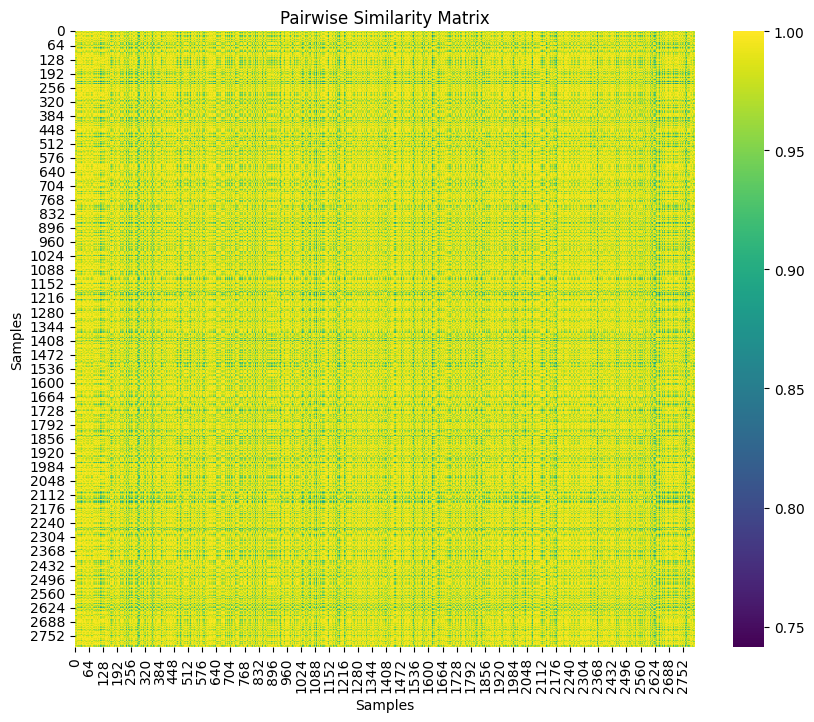

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="viridis", annot=False)
plt.title("Pairwise Similarity Matrix")
plt.xlabel("Samples")
plt.ylabel("Samples")
plt.show()


## Stable Diffusion

In [ ]:

from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
from tqdm import tqdm

from src.sd import train_vae_step, ImageDataset

image_transform = transforms.Compose([
    transforms.Resize((144, 144)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize to range [-1, 1]
])

image_folder = "images/train"
dataset = ImageDataset(image_folder, image_transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)



current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
log_dir = f"./logs/{current_time}"

writer = SummaryWriter(log_dir=log_dir)

vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae")
vae.to("cuda")
vae.train()

# Freeze all parameters
for param in vae.parameters():
    param.requires_grad = False

# Unfreeze the last layer of the decoder
last_layer = list(vae.decoder.children())[-1]
for param in last_layer.parameters():
    param.requires_grad = True


vae.to(torch.float32)

optimizer = torch.optim.Adam(vae.parameters(), lr=1e-6)

epochs = 5
global_step = 0  

for epoch in range(epochs):
    progress_bar = tqdm(dataloader, desc=f"Epoch {epoch + 1}/{epochs}", unit="batch")

    for step, pixel_values in enumerate(progress_bar):
        pixel_values = pixel_values.to("cuda").to(torch.float32)

        with torch.cuda.amp.autocast():
            loss = train_vae_step(vae, pixel_values)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        writer.add_scalar("Loss/train", loss.item(), global_step)

        progress_bar.set_postfix({"Loss": loss.item()})

        global_step += 1  # Increment global step for TensorBoard logging

print("VAE Fine-Tuning Complete!")

writer.close()


## VAE from scratch

In [ ]:
from src.vae import train

train(model, dataloader)

## DallE 

In [ ]:

def reset_weights(m):
    if isinstance(m, (nn.Conv2d, nn.ConvTranspose2d)):
        nn.init.xavier_uniform_(m.weight)  # Xavier initialization
        if m.bias is not None:
            nn.init.zeros_(m.bias)

class FootballPlayerDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [os.path.join(root_dir, fname) for fname in os.listdir(root_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]

    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, 0  # 0 as placeholder label

dataset_dir = "./data/images"
transform = transforms.Compose([
    transforms.Resize((144, 144)),
    transforms.ToTensor()
])
dataset = FootballPlayerDataset(root_dir=dataset_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

def fine_tune_model(enc, dec, dataloader, epochs=10, lr=1e-5):
    enc.eval()  # Freeze encoder
    dec.train()  # Fine-tune the decoder
    optimizer = optim.Adam(dec.parameters(), lr=lr)
    
    for epoch in range(epochs):
        total_loss = 0
        for images, _ in tqdm(dataloader):
            images = images.to(device)
            images = map_pixels(images)  # Apply map_pixels to the entire batch
            
            with torch.no_grad():  # Encoder is frozen
                z_logits = enc(images)
                z_indices = torch.argmax(z_logits, dim=1)  # Latent codes
                z_one_hot = nn.functional.one_hot(z_indices, num_classes=enc.vocab_size).permute(0, 3, 1, 2).float()
            
            x_stats = dec(z_one_hot).float()
            reconstructed_images = (torch.tanh(x_stats[:, :3]) + 1) / 2  # Rescale to [0, 1]

            reconstructed_images = reconstructed_images.clamp(0, 1)

            loss = nn.functional.mse_loss(reconstructed_images, images)
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(dec.parameters(), max_norm=1.0)  # Clip gradients
            optimizer.step()
            
            total_loss += loss.item()
        
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {total_loss / len(dataloader):.4f}")
        visualize_reconstruction(images, reconstructed_images)

def visualize_reconstruction(original_images, reconstructed_images):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    for i in range(5):
        axes[0, i].imshow(original_images[i].permute(1, 2, 0).cpu().numpy())
        axes[0, i].set_title("Original")
        axes[0, i].axis('off')

        reconstructed_img = reconstructed_images[i].detach().permute(1, 2, 0).cpu().numpy()
        axes[1, i].imshow(reconstructed_img)
        axes[1, i].set_title("Reconstructed")
        axes[1, i].axis('off')
    plt.show()


In [ ]:
for name, param in dec.named_parameters():
    if "blocks.output" in name:  
        param.requires_grad = True
    else:
        param.requires_grad = False  

fine_tune_model(enc, dec, dataloader, epochs=10, lr=1e-5)


## API Data Gathering Service

In [ ]:
from src.data_gathering_service import fetch_players_for_leagues_and_seasons
# Example usage:
league_ids = [39, 140, 78, 135, 61]  # Example: Premier League, La liga, Bundesliga, serie A, ligue 1, turkey  (Add more league IDs as needed)
seasons = [2024]  # List of seasons

# Fetch players data for all leagues and seasons
all_players_data = fetch_players_for_leagues_and_seasons(league_ids, seasons)
print(f"Total unique players fetched: {len(all_players_data)}")

json_data = json.dumps(all_players_data, indent=4)  # `indent=4` for pretty-printing

# Save JSON data to a file
with open('players_id_data_5league_5year.json', 'w') as json_file:
    json_file.write(json_data)

print("JSON data saved to players_id_data.json")